In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [34]:
Datos = pd.read_csv('./winequality-red.csv')
Datos.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
Datos.shape

(1599, 12)

In [36]:
Datos.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
Datos.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

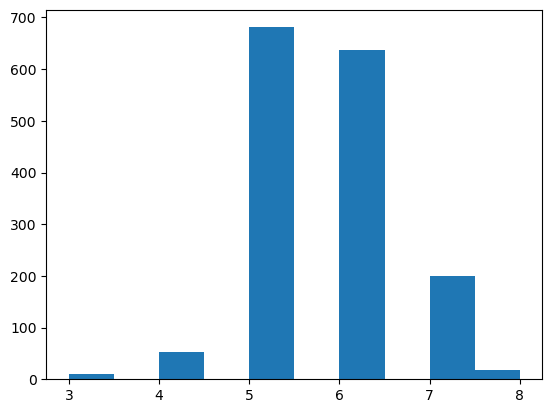

In [38]:
plt.hist(Datos.quality)

<Axes: xlabel='fixed_acidity', ylabel='volatile_acidity'>

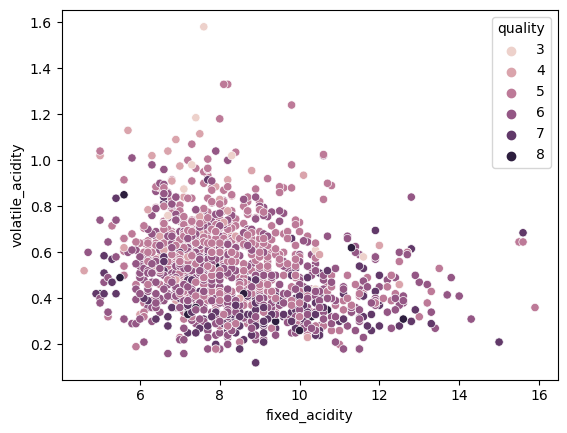

In [39]:
sns.scatterplot(x = "fixed_acidity", y = "volatile_acidity", hue = "quality", data = Datos)

In [40]:
predictors_col = ["fixed_acidity", "volatile_acidity", "free_sulfur_dioxide", "total_sulfur_dioxide"]
target_col = ['quality']

In [41]:
predictors_col = Datos[predictors_col]
target_col = Datos[target_col]

In [43]:
predictors_col

,fixed_acidity,volatile_acidity,free_sulfur_dioxide,total_sulfur_dioxide
0,7.4,0.700,11.0,34.0
1,7.8,0.880,25.0,67.0
2,7.8,0.760,15.0,54.0
3,11.2,0.280,17.0,60.0
4,7.4,0.700,11.0,34.0
...,...,...,...,...
1594,6.2,0.600,32.0,44.0
1595,5.9,0.550,39.0,51.0
1596,6.3,0.510,29.0,40.0
1597,5.9,0.645,32.0,44.0


In [44]:
target_col

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [46]:
corr = predictors_col.corr()
corr

,fixed_acidity,volatile_acidity,free_sulfur_dioxide,total_sulfur_dioxide
fixed_acidity,1.000000,-0.256131,-0.153794,-0.113181
volatile_acidity,-0.256131,1.000000,-0.010504,0.076470
free_sulfur_dioxide,-0.153794,-0.010504,1.000000,0.667666
total_sulfur_dioxide,-0.113181,0.076470,0.667666,1.000000


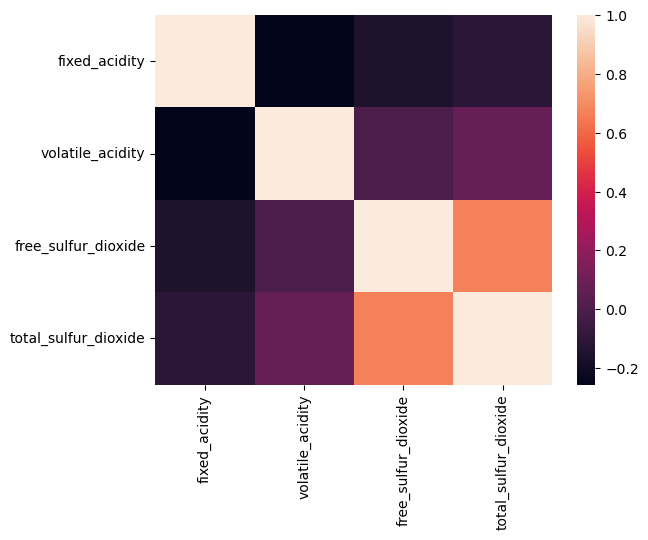

In [48]:
sns.heatmap(corr)
plt.show()

In [154]:
X_train, X_test, y_train, y_test = train_test_split(predictors_col, target_col, test_size=0.2, random_state=13)

In [155]:
tree = DecisionTreeClassifier()

In [156]:
arbol = tree.fit(X_train, y_train)

[Text(0.6017213866942844, 0.9807692307692307, 'x[1] <= 0.548\ngini = 0.646\nsamples = 1279\nvalue = [9, 45, 535, 514, 164, 12]'),
 Text(0.3124078694839125, 0.9423076923076923, 'x[3] <= 63.5\ngini = 0.649\nsamples = 699\nvalue = [1, 14, 210, 331, 133, 10]'),
 Text(0.1295220844815862, 0.9038461538461539, 'x[1] <= 0.335\ngini = 0.632\nsamples = 551\nvalue = [1, 10, 130, 284, 118, 8]'),
 Text(0.06094985863068609, 0.8653846153846154, 'x[2] <= 13.5\ngini = 0.605\nsamples = 148\nvalue = [0, 1, 17, 73, 55, 2]'),
 Text(0.01825274685945385, 0.8269230769230769, 'x[3] <= 36.0\ngini = 0.623\nsamples = 105\nvalue = [0, 0, 14, 44, 45, 2]'),
 Text(0.015962206077091014, 0.7884615384615384, 'x[0] <= 7.45\ngini = 0.607\nsamples = 102\nvalue = [0, 0, 11, 44, 45, 2]'),
 Text(0.004581081564725672, 0.75, 'x[3] <= 31.0\ngini = 0.245\nsamples = 7\nvalue = [0, 0, 1, 6, 0, 0]'),
 Text(0.002290540782362836, 0.7115384615384616, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0]'),
 Text(0.006871622347088508, 0.7

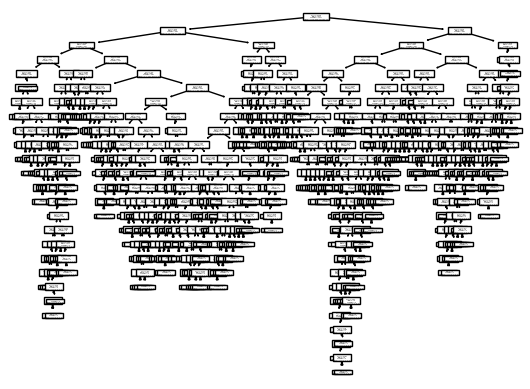

In [157]:
plot_tree(arbol)

In [158]:
predicciones = arbol.predict(X_test)

In [159]:
predicciones

array([5, 4, 5, 5, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 6, 6, 7, 5, 6, 5, 7,
       8, 5, 6, 7, 5, 5, 5, 5, 5, 7, 5, 6, 5, 7, 5, 5, 6, 5, 5, 5, 6, 6,
       6, 7, 6, 7, 7, 6, 5, 5, 6, 5, 7, 5, 5, 6, 3, 5, 5, 5, 5, 5, 7, 7,
       5, 5, 5, 7, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6,
       7, 4, 5, 6, 7, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5,
       7, 7, 5, 5, 6, 5, 7, 7, 5, 6, 5, 3, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5,
       7, 7, 7, 5, 7, 5, 6, 5, 5, 5, 3, 7, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 6, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5,
       5, 5, 5, 4, 5, 6, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6,
       5, 6, 7, 5, 5, 6, 5, 4, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6,
       6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 3, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 7, 7,
       6, 7, 6, 5, 5, 6, 5, 6, 5, 6, 4, 5, 5, 6, 5,

In [160]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,0,1,0
4,1,1,4,2,0,0
5,3,3,102,31,7,0
6,1,2,37,74,9,1
7,0,0,7,9,19,0
8,0,0,1,4,1,0


In [161]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6125